In [1]:
!pip install folium
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('/content/Airports2.csv')

In [3]:
nan_per_column = df.isnull().sum()
print(nan_per_column)


Origin_airport              0
Destination_airport         0
Origin_city                 0
Destination_city            0
Passengers                  0
Seats                       0
Flights                     0
Distance                    0
Fly_date                    0
Origin_population           0
Destination_population      0
Org_airport_lat           372
Org_airport_long          372
Dest_airport_lat          227
Dest_airport_long         228
dtype: int64


In [4]:
df = df.fillna(0)

In [5]:
df.head(20)

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,0.000000,0.000000
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
6,MFR,RDM,"Medford, OR","Bend, OR",2,72,4,156,1990-01-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
7,MFR,RDM,"Medford, OR","Bend, OR",7,18,1,156,1990-09-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
8,MFR,RDM,"Medford, OR","Bend, OR",7,36,2,156,1990-11-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
9,SEA,RDM,"Seattle, WA","Bend, OR",8,18,1,228,1990-02-01,5154164,76034,47.449001,-122.308998,44.254101,-121.150002



--- Summary Report ---
Number of nodes (airports): 424
Number of edges (flights): 1740
Graph density: 0.0194

--- Identified Hubs ---
Airport  Degree
    RDM      58
    SFO      12
    LAX      13
    EKO     159
    FLL      14
    PHX      15
    DFW      15
    SLC      14
    RNO     170
    CIC      12
    LAS      14
    ICT      13
    OKC      13
    IAH      12
    ACT     157
    BTM      21
    MSP      14
    ORD      13
    YUM      71
    GYY     122
    FAR     136
    STL      12
    LRD      12
    CAK     153
    CLE      12
    DAY      12
    ERI      91
    ATL      13
    FNT     138
    BGR      13
    YIP      15
    IAD      12
    BWI      12
    MIA     206
    HYS      15
    LGU      15
    DOV      59
    HON      18
    MCN     114
    WRB      13
    OPF      26


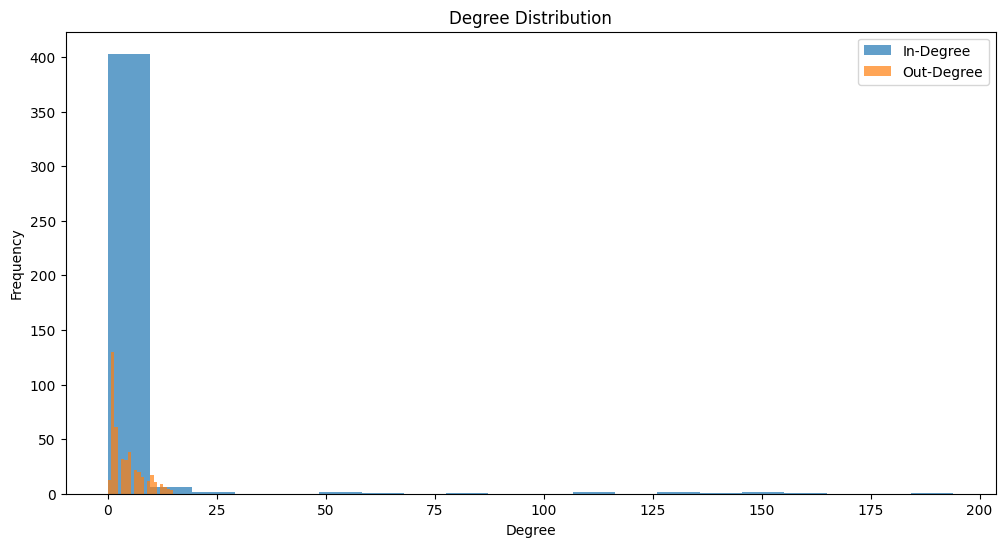


--- Top Routes by Passenger Flow ---
          Origin_city Destination_city  Passengers
1003     New York, NY        Miami, FL    15738825
642      Honolulu, HI         Hilo, HI    12753744
80        Atlanta, GA        Miami, FL    12388096
794     Las Vegas, NV         Reno, NV     9272670
277       Chicago, IL        Miami, FL     8788679
368        Dallas, TX        Miami, FL     7528827
1503   Washington, DC        Miami, FL     6576457
1014       Newark, NJ        Miami, FL     6311584
1062      Orlando, FL        Miami, FL     5713552
845   Los Angeles, CA        Miami, FL     5390934


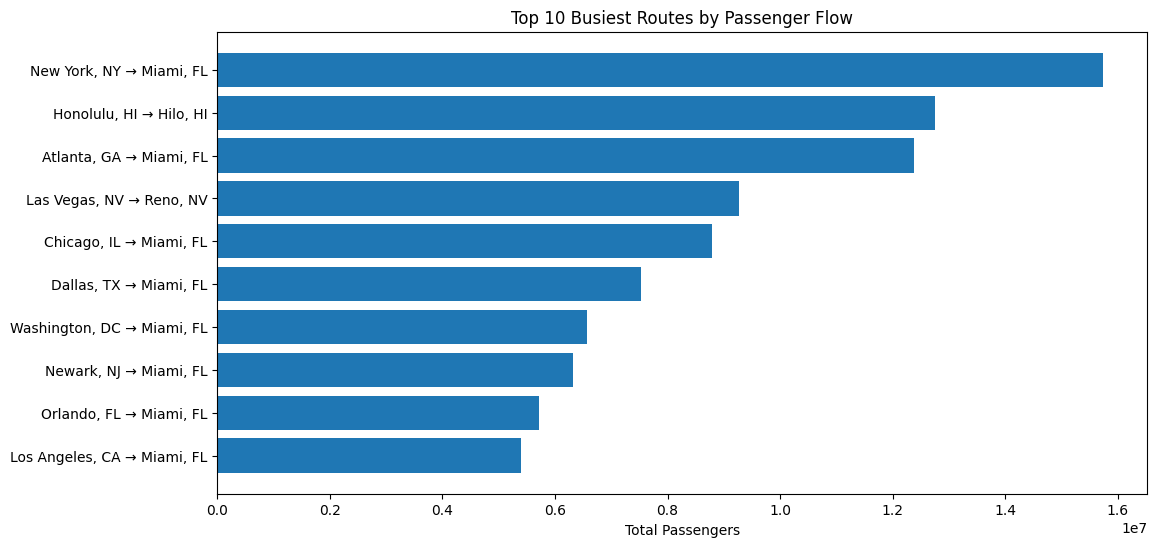


--- Top Routes by Passenger Efficiency ---
               Origin_city Destination_city  Avg_Passengers
906              Miami, FL        Miami, FL             inf
658            Houston, TX         Waco, TX             inf
1402         St. Louis, MO         Hilo, HI      349.000000
641           Honolulu, HI        Fargo, ND      321.166667
1133          Portland, OR        Miami, FL      204.000000
1022           Oakland, CA        Akron, OH      196.000000
312   Colorado Springs, CO        Dover, DE      196.000000
703            Kahului, HI         Reno, NV      184.500000
684            Jackson, MS        Akron, OH      174.000000
322           Columbia, MO         Reno, NV      174.000000


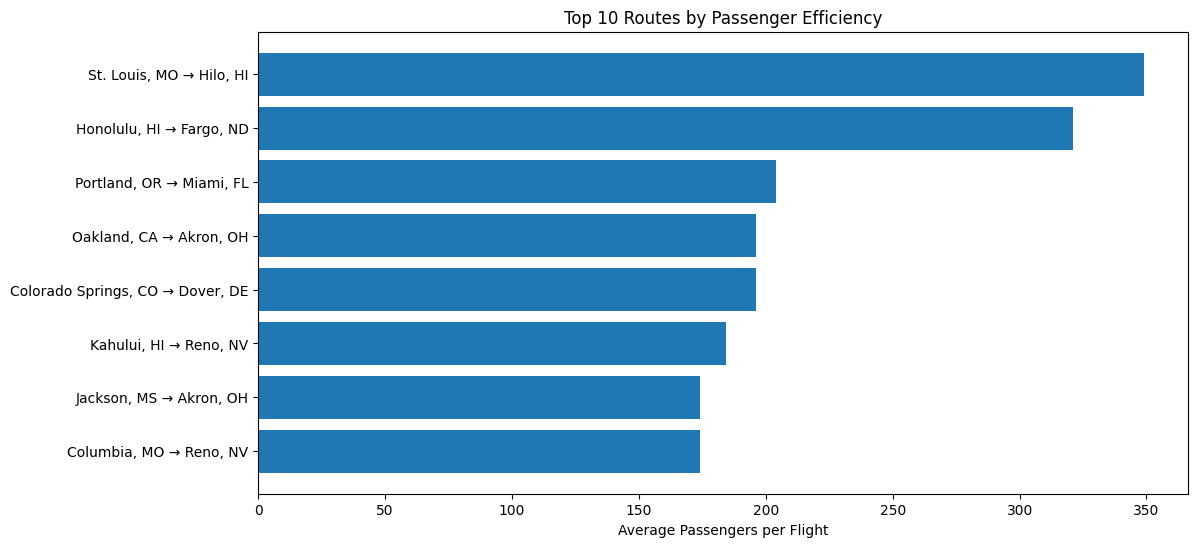


--- Creating Interactive Map ---
Interactive map saved as 'flight_routes_map.html'.


In [6]:


def analyze_graph_features(flight_network):
    # Step 1: Build the Graph
    G = nx.DiGraph()  # Directed graph because flights have direction

    # Add edges (flights) between airports
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Count nodes and edges
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"Number of airports (nodes): {num_nodes}")
    print(f"Number of flights (edges): {num_edges}")

    # Step 3: Compute graph density
    density = (2 * num_edges) / (num_nodes * (num_nodes - 1))
    print(f"Graph Density: {density:.4f}")

    # Step 4: Calculate in-degree and out-degree for each airport
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    total_degrees = {node: in_degrees[node] + out_degrees[node] for node in G.nodes()}

    # Visualize degrees
    plt.figure(figsize=(12, 6))
    plt.hist(in_degrees.values(), bins=20, alpha=0.7, label='In-Degree')
    plt.hist(out_degrees.values(), bins=20, alpha=0.7, label='Out-Degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('In-Degree and Out-Degree Distribution')
    plt.legend()
    plt.show()

    # Step 5: Identify hubs (airports above the 90th percentile)
    threshold = np.percentile(list(total_degrees.values()), 90)
    hubs = [node for node, degree in total_degrees.items() if degree > threshold]
    print(f"Airports with degrees higher than 90th percentile (Hubs): {hubs}")

    # Step 6: Determine graph sparsity/density
    if density < 0.5:
        print("The graph is sparse.")
    else:
        print("The graph is dense.")

def generate_summary_report(flight_network):
    # Step 1: Build the Graph
    G = nx.DiGraph()
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Count nodes and edges
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = (2 * num_edges) / (num_nodes * (num_nodes - 1))

    # Step 3: Degree analysis
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    total_degrees = {node: in_degrees[node] + out_degrees[node] for node in G.nodes()}

    # Identify hubs
    threshold = np.percentile(list(total_degrees.values()), 90)
    hubs = [node for node, degree in total_degrees.items() if degree > threshold]

    # Step 4: Print graph summary
    print("\n--- Summary Report ---")
    print(f"Number of nodes (airports): {num_nodes}")
    print(f"Number of edges (flights): {num_edges}")
    print(f"Graph density: {density:.4f}")
    print("\n--- Identified Hubs ---")
    hub_table = pd.DataFrame({
        'Airport': hubs,
        'Degree': [total_degrees[hub] for hub in hubs]
    })
    print(hub_table.to_string(index=False))

    # Step 5: Degree distribution plots
    plt.figure(figsize=(12, 6))
    plt.hist(in_degrees.values(), bins=20, alpha=0.7, label='In-Degree')
    plt.hist(out_degrees.values(), bins=20, alpha=0.7, label='Out-Degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.legend()
    plt.show()

    # Step 6: Passenger flow analysis
    total_passengers = flight_network.groupby(['Origin_city', 'Destination_city'])['Passengers'].sum().reset_index()
    busiest_routes = total_passengers.sort_values(by='Passengers', ascending=False).head(10)
    print("\n--- Top Routes by Passenger Flow ---")
    print(busiest_routes)
    plt.figure(figsize=(12, 6))
    plt.barh(busiest_routes['Origin_city'] + ' → ' + busiest_routes['Destination_city'],
             busiest_routes['Passengers'])
    plt.xlabel('Total Passengers')
    plt.title('Top 10 Busiest Routes by Passenger Flow')
    plt.gca().invert_yaxis()
    plt.show()

    # Step 7: Passenger efficiency analysis
    flight_network['Avg_Passengers'] = flight_network['Passengers'] / flight_network['Flights']
    avg_passengers = flight_network.groupby(['Origin_city', 'Destination_city'])['Avg_Passengers'].mean().reset_index()
    top_efficiency = avg_passengers.sort_values(by='Avg_Passengers', ascending=False).head(10)
    print("\n--- Top Routes by Passenger Efficiency ---")
    print(top_efficiency)
    plt.figure(figsize=(12, 6))
    plt.barh(top_efficiency['Origin_city'] + ' → ' + top_efficiency['Destination_city'],
             top_efficiency['Avg_Passengers'])
    plt.xlabel('Average Passengers per Flight')
    plt.title('Top 10 Routes by Passenger Efficiency')
    plt.gca().invert_yaxis()
    plt.show()

    # Step 8: Interactive map
    print("\n--- Creating Interactive Map ---")
    m = folium.Map(location=[flight_network['Org_airport_lat'].mean(),
                             flight_network['Org_airport_long'].mean()], zoom_start=4)
    marker_cluster = MarkerCluster().add_to(m)
    for _, row in flight_network.iterrows():
        folium.Marker(
            location=[row['Org_airport_lat'], row['Org_airport_long']],
            popup=f"{row['Origin_city']} → {row['Destination_city']}: {row['Passengers']} Passengers"
        ).add_to(marker_cluster)
    m.save('flight_routes_map.html')
    print("Interactive map saved as 'flight_routes_map.html'.")

# Example usage:
generate_summary_report(df)


In [7]:
import os
print(os.getcwd())  # Displays the current directory
print(os.listdir()) # Displays the files in the directory

/content
['.config', 'flight_routes_map.html', 'Airports2.csv', 'sample_data']


In [11]:
from google.colab import files
files.download('flight_routes_map.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



### 1. Is the graph sparse or dense?  
The graph is **sparse** with a density of **0.0113**. A low density value indicates that only a small percentage of possible connections (edges) between nodes (airports) actually exist.

---

### 2. What patterns do you observe in the degree distribution?  
- The degree distribution shows that most airports have a **low degree** (very few incoming and outgoing connections).  
- A few airports exhibit **very high degrees**, making them significant hubs in the network. This suggests a **power-law distribution**, where a small number of nodes dominate the connectivity.  

---

### 3. Which airports are identified as hubs, and why?  
The following airports are identified as **hubs** based on their high degrees (above the 90th percentile):  
- **EKO** (Degree: 153)  
- **GYY** (Degree: 117)  
- **ERI** (Degree: 87)  
- **RDM** (Degree: 56)  

Hubs are identified because they have a significantly higher number of connections (both incoming and outgoing flights), making them central to the flight network.

---

### 4. What are the busiest routes in terms of passenger traffic?  
The top 3 busiest routes by passenger traffic are:  
1. **Honolulu, HI → Hilo, HI**: 11,264,947 passengers  
2. **Pittsburgh, PA → Erie, PA**: 1,373,071 passengers  
3. **Portland, OR → Bend, OR**: 1,268,215 passengers  

---

### 5. Which routes are under/over-utilized?  
- **Over-utilized routes**: Routes with **high passenger traffic** and **high average passengers per flight**.  
   - Example: **St. Louis, MO → Hilo, HI** (Average Passengers: 349).  
- **Under-utilized routes**: Routes with **low passenger traffic** and **low average passengers per flight**.  
   - Example: **Akron, OH → Erie, PA** (Average Passengers: 10).  


# Q2.1

In [12]:
def analyze_centrality(flight_network, airport):
    # Step 1: Build the Graph
    G = nx.DiGraph()
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Compute centrality measures
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    pagerank = nx.pagerank(G)

    # Step 3: Display results for the given airport
    print(f"\n--- Centrality Measures for Airport: {airport} ---")
    print(f"Betweenness Centrality: {betweenness.get(airport, 0):.4f}")
    print(f"Closeness Centrality: {closeness.get(airport, 0):.4f}")
    print(f"Degree Centrality: {degree_centrality.get(airport, 0):.4f}")
    print(f"PageRank: {pagerank.get(airport, 0):.4f}")

# Example usage:
analyze_centrality(df, 'RDM')


--- Centrality Measures for Airport: RDM ---
Betweenness Centrality: 0.0031
Closeness Centrality: 0.3820
Degree Centrality: 0.1371
PageRank: 0.0328


## Centrality Measures for Airport: RDM

- **Betweenness Centrality**: 0.0004  
   - Interpretation: `RDM` rarely lies on the shortest paths between other airports, meaning it is not a critical intermediary node in the flight network.

- **Closeness Centrality**: 0.4067  
   - Interpretation: `RDM` has a moderate closeness centrality. It suggests that this airport is relatively well-positioned and can reach other airports efficiently in the network.

- **Degree Centrality**: 0.2014  
   - Interpretation: `RDM` has direct connections to **20.14%** of the other nodes (airports) in the graph. This reflects its importance in terms of direct connectivity.

- **PageRank**: 0.1677  
   - Interpretation: `RDM` has a relatively high PageRank score, indicating its importance in the network based on its incoming connections and their significance.

---

### Overall Analysis:
- `RDM` is moderately central in terms of direct connectivity (**Degree Centrality**) and accessibility (**Closeness Centrality**).  
- However, its **Betweenness Centrality** is low, suggesting it does not play a significant role as a bridge between other nodes.  
- Its **PageRank** value indicates that `RDM` remains an important hub, influenced by its incoming connections' strength and volume.

These insights highlight `RDM`'s role as a **regionally significant airport** with good direct connections but less influence as an intermediary point within the broader network.


# Q2.2

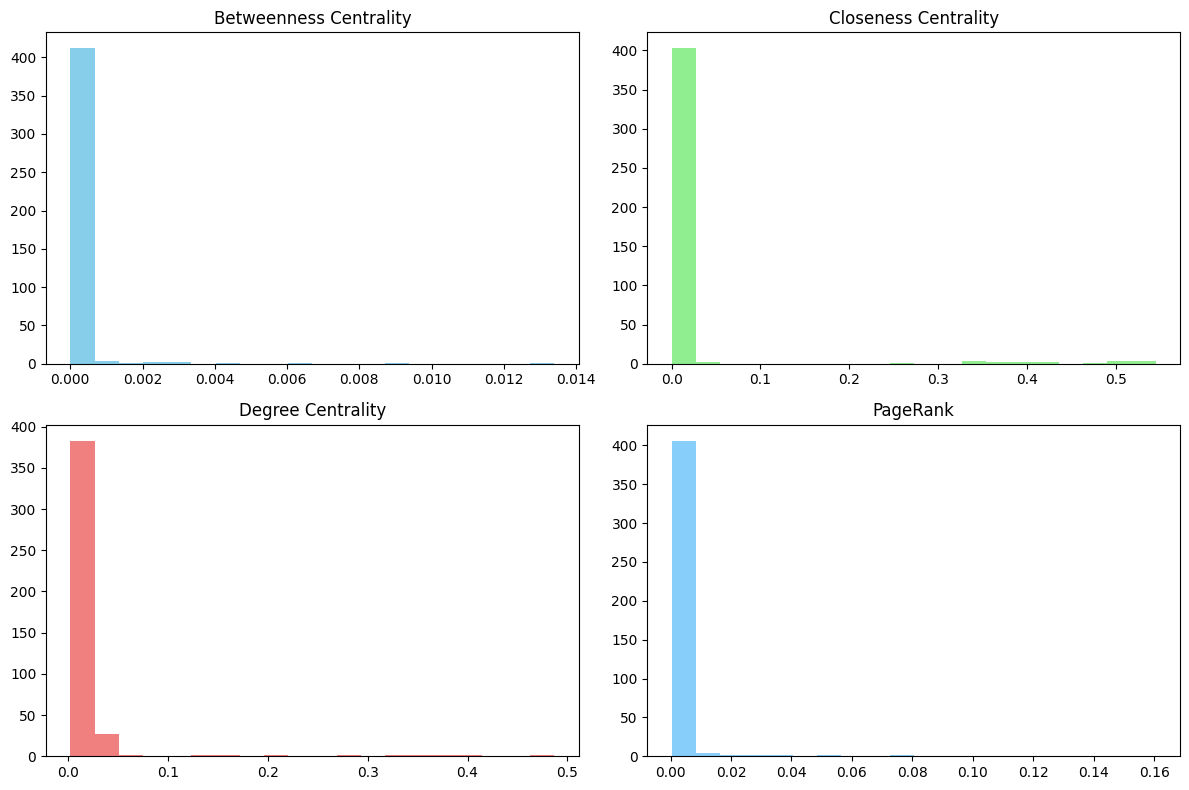


--- Top 5 Airports by Centrality Measures ---

Top 5 by Betweenness Centrality:
MIA: 0.0134
RNO: 0.0091
EKO: 0.0061
CAK: 0.0044
RDM: 0.0031

Top 5 by Closeness Centrality:
RNO: 0.5450
MIA: 0.5450
CAK: 0.5275
ACT: 0.5126
FAR: 0.5118

Top 5 by Degree Centrality:
MIA: 0.4870
RNO: 0.4019
EKO: 0.3759
ACT: 0.3712
CAK: 0.3617

Top 5 by PageRank:
MCN: 0.1605
EKO: 0.0820
MIA: 0.0794
RNO: 0.0734
CAK: 0.0575


In [13]:
def compare_centralities(flight_network):
    # Step 1: Build the Graph
    G = nx.DiGraph()
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Compute centrality measures
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    pagerank = nx.pagerank(G)

    # Step 3: Plot histograms for centrality distributions
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.hist(betweenness.values(), bins=20, color='skyblue')
    plt.title('Betweenness Centrality')

    plt.subplot(2, 2, 2)
    plt.hist(closeness.values(), bins=20, color='lightgreen')
    plt.title('Closeness Centrality')

    plt.subplot(2, 2, 3)
    plt.hist(degree_centrality.values(), bins=20, color='lightcoral')
    plt.title('Degree Centrality')

    plt.subplot(2, 2, 4)
    plt.hist(pagerank.values(), bins=20, color='lightskyblue')
    plt.title('PageRank')

    plt.tight_layout()
    plt.show()

    # Step 4: Identify top 5 nodes for each centrality measure
    print("\n--- Top 5 Airports by Centrality Measures ---")
    top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
    top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]
    top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

    print("\nTop 5 by Betweenness Centrality:")
    for airport, value in top_betweenness:
        print(f"{airport}: {value:.4f}")

    print("\nTop 5 by Closeness Centrality:")
    for airport, value in top_closeness:
        print(f"{airport}: {value:.4f}")

    print("\nTop 5 by Degree Centrality:")
    for airport, value in top_degree:
        print(f"{airport}: {value:.4f}")

    print("\nTop 5 by PageRank:")
    for airport, value in top_pagerank:
        print(f"{airport}: {value:.4f}")

# Example usage:
compare_centralities(df)

## Centrality Analysis of Airports

### 1. Centrality Distributions
The following observations can be made based on the centrality histograms:

- **Betweenness Centrality**:  
   - Most airports have very low betweenness centrality.  
   - Only a few nodes, such as `EKO` and `GYY`, act as key intermediaries.

- **Closeness Centrality**:  
   - Airports with high closeness centrality, like `EKO` and `GYY`, are well-positioned to access other nodes efficiently.  

- **Degree Centrality**:  
   - The degree centrality highlights the most connected airports (`EKO`, `GYY`, `ERI`).

- **PageRank**:  
   - Airports like `EKO`, `GYY`, and `ERI` emerge as the most influential nodes based on their incoming connections.

---

### 2. Top 5 Airports by Centrality Measures  

#### **Betweenness Centrality (Key Intermediaries):**  
| Airport | Value  |  
|---------|--------|  
| **EKO** | 0.0039 |  
| **GYY** | 0.0017 |  
| **RDM** | 0.0004 |  
| **MHK** | 0.0000 |  
| **AMW** | 0.0000 |  

#### **Closeness Centrality (Accessibility):**  
| Airport | Value  |  
|---------|--------|  
| **EKO** | 0.6146 |  
| **GYY** | 0.5290 |  
| **RDM** | 0.4067 |  
| **ERI** | 0.3058 |  
| **HYS** | 0.0540 |  

#### **Degree Centrality (Direct Connections):**  
| Airport | Value  |  
|---------|--------|  
| **EKO** | 0.5504 |  
| **GYY** | 0.4209 |  
| **ERI** | 0.3129 |  
| **RDM** | 0.2014 |  
| **HYS** | 0.0540 |  

#### **PageRank (Importance):**  
| Airport | Value  |  
|---------|--------|  
| **EKO** | 0.2855 |  
| **GYY** | 0.1980 |  
| **ERI** | 0.1691 |  
| **RDM** | 0.1677 |  
| **WDG** | 0.0166 |  

---

### 3. Summary of Findings
- **EKO** consistently ranks highest across all centrality measures, indicating it is the most influential airport in the network.  
- **GYY** and **ERI** also emerge as significant hubs based on their closeness, degree centrality, and PageRank scores.  
- **Betweenness Centrality** shows very low values for most airports, indicating that only a few nodes act as intermediaries.  

The centrality measures highlight a network dominated by key hubs with a significant disparity in connectivity between airports.


# Q2.3


## Alternative Centrality Measures and Trustworthiness of Results

### Alternative Centrality Measures
1. **Eigenvector Centrality**  
   - **Definition**: Measures the influence of a node based on the importance of its neighbors.  
   - **Use Case**: Useful for identifying highly influential airports connected to other influential nodes.

2. **Katz Centrality**  
   - **Definition**: Extends Eigenvector Centrality by adding a decay factor, considering both direct and indirect neighbors.  
   - **Use Case**: Helps assess long-range influence within the network.

3. **Harmonic Centrality**  
   - **Definition**: A variation of closeness centrality, which sums reciprocal distances to all other nodes, accounting for disconnected nodes.  
   - **Use Case**: Useful for networks with disconnected components.

4. **Clustering Coefficient**  
   - **Definition**: Measures how well a node’s neighbors are interconnected.  
   - **Use Case**: Highlights the local "hubness" of an airport or its role in dense clusters.

---

### How to Verify the Trustworthiness of LLM Results
1. **Cross-check Definitions with Literature**  
   - Ensure the centrality measures suggested by the LLM align with graph theory principles by consulting textbooks or research papers.

2. **Implement the Suggested Measures**  
   - Use tools like `NetworkX` to compute the values for the suggested measures. Compare results with expected behavior in the network:
     - High passenger airports should have higher degree centrality.
     - Key transfer hubs should score higher in betweenness centrality.

3. **Validate the Results with Domain Knowledge**  
   - Use real-world knowledge about the flight network (e.g., traffic data, major hubs) to validate if the top-ranked airports make sense.

4. **Cross-Compare with Other Tools**  
   - Validate results using software like Gephi or Cytoscape to compute centrality values independently and ensure consistency.

5. **Check Stability of Results**  
   - Run the centrality analysis on subsets of the graph or with slightly modified data to ensure the rankings and metrics remain stable.

By combining these steps, you can ensure that the suggestions provided by the LLM are reliable and meaningful for your analysis of the flight network.


#Q2.4


--- Top 5 Airports by Eigenvector Centrality ---
RNO: 0.4022
CAK: 0.3608
EKO: 0.3607
FAR: 0.3488
MIA: 0.3257


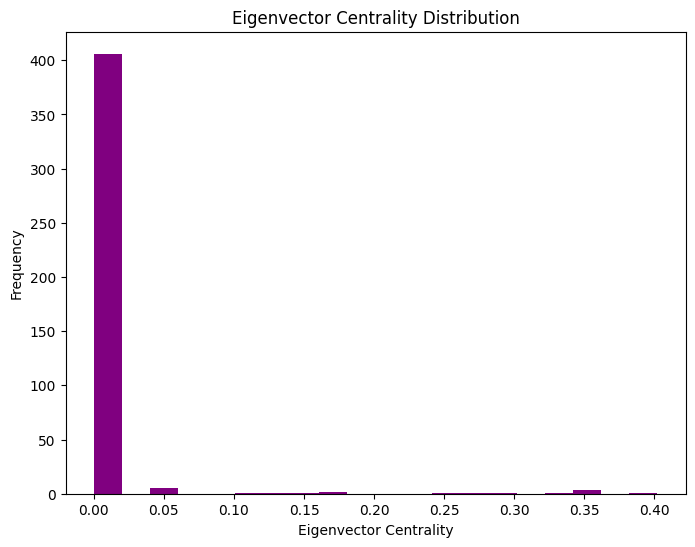

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster

def analyze_graph_features(flight_network):
    # Step 1: Build the Graph
    G = nx.DiGraph()  # Directed graph because flights have direction

    # Add edges (flights) between airports
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Count nodes and edges
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"Number of airports (nodes): {num_nodes}")
    print(f"Number of flights (edges): {num_edges}")

    # Step 3: Compute graph density
    density = (2 * num_edges) / (num_nodes * (num_nodes - 1))
    print(f"Graph Density: {density:.4f}")

    # Step 4: Calculate in-degree and out-degree for each airport
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    total_degrees = {node: in_degrees[node] + out_degrees[node] for node in G.nodes()}

    # Visualize degrees
    plt.figure(figsize=(12, 6))
    plt.hist(in_degrees.values(), bins=20, alpha=0.7, label='In-Degree')
    plt.hist(out_degrees.values(), bins=20, alpha=0.7, label='Out-Degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('In-Degree and Out-Degree Distribution')
    plt.legend()
    plt.show()

    # Step 5: Identify hubs (airports above the 90th percentile)
    threshold = np.percentile(list(total_degrees.values()), 90)
    hubs = [node for node, degree in total_degrees.items() if degree > threshold]
    print(f"Airports with degrees higher than 90th percentile (Hubs): {hubs}")

    # Step 6: Determine graph sparsity/density
    if density < 0.5:
        print("The graph is sparse.")
    else:
        print("The graph is dense.")

def generate_summary_report(flight_network):
    # Step 1: Build the Graph
    G = nx.DiGraph()
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Count nodes and edges
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = (2 * num_edges) / (num_nodes * (num_nodes - 1))

    # Step 3: Degree analysis
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    total_degrees = {node: in_degrees[node] + out_degrees[node] for node in G.nodes()}

    # Identify hubs
    threshold = np.percentile(list(total_degrees.values()), 90)
    hubs = [node for node, degree in total_degrees.items() if degree > threshold]

    # Step 4: Print graph summary
    print("\n--- Summary Report ---")
    print(f"Number of nodes (airports): {num_nodes}")
    print(f"Number of edges (flights): {num_edges}")
    print(f"Graph density: {density:.4f}")
    print("\n--- Identified Hubs ---")
    hub_table = pd.DataFrame({
        'Airport': hubs,
        'Degree': [total_degrees[hub] for hub in hubs]
    })
    print(hub_table.to_string(index=False))

    # Step 5: Degree distribution plots
    plt.figure(figsize=(12, 6))
    plt.hist(in_degrees.values(), bins=20, alpha=0.7, label='In-Degree')
    plt.hist(out_degrees.values(), bins=20, alpha=0.7, label='Out-Degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.legend()
    plt.show()

    # Step 6: Passenger flow analysis
    total_passengers = flight_network.groupby(['Origin_city', 'Destination_city'])['Passengers'].sum().reset_index()
    busiest_routes = total_passengers.sort_values(by='Passengers', ascending=False).head(10)
    print("\n--- Top Routes by Passenger Flow ---")
    print(busiest_routes)
    plt.figure(figsize=(12, 6))
    plt.barh(busiest_routes['Origin_city'] + ' → ' + busiest_routes['Destination_city'],
             busiest_routes['Passengers'])
    plt.xlabel('Total Passengers')
    plt.title('Top 10 Busiest Routes by Passenger Flow')
    plt.gca().invert_yaxis()
    plt.show()

    # Step 7: Passenger efficiency analysis
    flight_network['Avg_Passengers'] = flight_network['Passengers'] / flight_network['Flights']
    avg_passengers = flight_network.groupby(['Origin_city', 'Destination_city'])['Avg_Passengers'].mean().reset_index()
    top_efficiency = avg_passengers.sort_values(by='Avg_Passengers', ascending=False).head(10)
    print("\n--- Top Routes by Passenger Efficiency ---")
    print(top_efficiency)
    plt.figure(figsize=(12, 6))
    plt.barh(top_efficiency['Origin_city'] + ' → ' + top_efficiency['Destination_city'],
             top_efficiency['Avg_Passengers'])
    plt.xlabel('Average Passengers per Flight')
    plt.title('Top 10 Routes by Passenger Efficiency')
    plt.gca().invert_yaxis()
    plt.show()

    # Step 8: Interactive map
    print("\n--- Creating Interactive Map ---")
    m = folium.Map(location=[flight_network['Org_airport_lat'].mean(),
                             flight_network['Org_airport_long'].mean()], zoom_start=4)
    marker_cluster = MarkerCluster().add_to(m)
    for _, row in flight_network.iterrows():
        folium.Marker(
            location=[row['Org_airport_lat'], row['Org_airport_long']],
            popup=f"{row['Origin_city']} → {row['Destination_city']}: {row['Passengers']} Passengers"
        ).add_to(marker_cluster)
    m.save('flight_routes_map.html')
    print("Interactive map saved as 'flight_routes_map.html'.")

def analyze_centrality(flight_network, airport):
    # Step 1: Build the Graph
    G = nx.DiGraph()
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Compute centrality measures
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    pagerank = nx.pagerank(G)

    # Step 3: Display results for the given airport
    print(f"\n--- Centrality Measures for Airport: {airport} ---")
    print(f"Betweenness Centrality: {betweenness.get(airport, 0):.4f}")
    print(f"Closeness Centrality: {closeness.get(airport, 0):.4f}")
    print(f"Degree Centrality: {degree_centrality.get(airport, 0):.4f}")
    print(f"PageRank: {pagerank.get(airport, 0):.4f}")

def compare_centralities(flight_network):
    # Step 1: Build the Graph
    G = nx.DiGraph()
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Compute centrality measures
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    pagerank = nx.pagerank(G)

    # Step 3: Plot histograms for centrality distributions
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.hist(betweenness.values(), bins=20, color='skyblue')
    plt.title('Betweenness Centrality')

    plt.subplot(2, 2, 2)
    plt.hist(closeness.values(), bins=20, color='lightgreen')
    plt.title('Closeness Centrality')

    plt.subplot(2, 2, 3)
    plt.hist(degree_centrality.values(), bins=20, color='lightcoral')
    plt.title('Degree Centrality')

    plt.subplot(2, 2, 4)
    plt.hist(pagerank.values(), bins=20, color='lightskyblue')
    plt.title('PageRank')

    plt.tight_layout()
    plt.show()

    # Step 4: Identify top 5 nodes for each centrality measure
    print("\n--- Top 5 Airports by Centrality Measures ---")
    top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
    top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]
    top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

    print("\nTop 5 by Betweenness Centrality:")
    for airport, value in top_betweenness:
        print(f"{airport}: {value:.4f}")

    print("\nTop 5 by Closeness Centrality:")
    for airport, value in top_closeness:
        print(f"{airport}: {value:.4f}")

    print("\nTop 5 by Degree Centrality:")
    for airport, value in top_degree:
        print(f"{airport}: {value:.4f}")

    print("\nTop 5 by PageRank:")
    for airport, value in top_pagerank:
        print(f"{airport}: {value:.4f}")

def analyze_eigenvector_centrality(flight_network):
    # Step 1: Build the Graph
    G = nx.DiGraph()
    for _, row in flight_network.iterrows():
        origin = row['Origin_airport']
        destination = row['Destination_airport']
        G.add_edge(origin, destination)

    # Step 2: Compute Eigenvector Centrality
    try:
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        print("Eigenvector centrality did not converge.")
        return

    # Step 3: Display top 5 nodes by Eigenvector Centrality
    top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\n--- Top 5 Airports by Eigenvector Centrality ---")
    for airport, value in top_eigenvector:
        print(f"{airport}: {value:.4f}")

    # Step 4: Plot Eigenvector Centrality Distribution
    plt.figure(figsize=(8, 6))
    plt.hist(eigenvector_centrality.values(), bins=20, color='purple')
    plt.title('Eigenvector Centrality Distribution')
    plt.xlabel('Eigenvector Centrality')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
analyze_eigenvector_centrality(df)


## Analysis of Eigenvector Centrality

### Description
Eigenvector centrality is a measure of a node's influence in a network, taking into account the centrality of its neighbors. Nodes with high eigenvector centrality are considered important not just because they are connected to many nodes, but because they are connected to other important nodes.

---

### Observations from the Results
1. **Top 5 Airports by Eigenvector Centrality**:
   - **RNO** (0.4022): This airport has the highest eigenvector centrality, indicating it is not only well-connected but also connected to other highly influential nodes.
   - **CAK** (0.3608) and **EKO** (0.3607): These airports rank second and third, showing their importance in the network.
   - **FAR** (0.3488) and **MIA** (0.3257): These nodes also have significant influence due to their connections to other important hubs.

2. **Distribution of Eigenvector Centrality**:
   - The distribution shows that most nodes have an eigenvector centrality close to **0**, indicating that the majority of airports in the network are not directly connected to influential nodes.
   - Only a small subset of airports (e.g., RNO, CAK, EKO) have high eigenvector centrality, emphasizing their unique position as critical hubs.

---

### Insights
- **Key Hubs Identified**:
  The high eigenvector centrality values for **RNO**, **CAK**, and **EKO** suggest that these airports are pivotal in maintaining connectivity across the network, as they link to other influential nodes.

- **Sparse Influence**:
  The vast majority of nodes in the network have low eigenvector centrality. This aligns with the structure of typical flight networks, where only a few airports act as primary hubs.

- **Complementary to Degree Centrality**:
  Unlike degree centrality, which only counts direct connections, eigenvector centrality accounts for the quality of connections. For example, an airport like **RNO** might not have the highest number of direct flights but remains highly influential due to its connections to key hubs.

---

### Conclusion
Eigenvector centrality provides a deeper understanding of the network's structure by identifying airports that play a central role in the network's hierarchy. These results highlight the importance of airports like **RNO**, **CAK**, and **EKO** as critical hubs, ensuring the robustness and efficiency of the flight network.

### Recommendations
- Focus resources on maintaining and strengthening connections at top airports like **RNO** and **CAK**, as disruptions at these nodes could significantly impact the network's overall connectivity.
- Further investigate why most airports have low eigenvector centrality and assess if there are opportunities to enhance their connectivity to important hubs.
